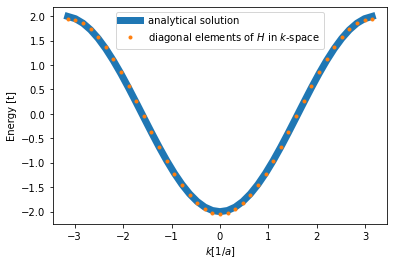

In [11]:
import numpy as np
import pylab

#constants
Nhalf = 20
t = 1

N = 2 * Nhalf + 1

#define real space and momentum space variables
x = np.linspace(-0.5, 0.5, N)
dx = 1. / (N-1)

#define Hamiltonian
H = np.zeros((N, N))
for i in range(N - 1):
    H[i, i + 1] = -t
    H[i + 1, i] = -t

H[N - 1, 0] = -t
H[0, N - 1] = -t  # Apply periodic boundary conditions

#define unitary matrix for Fourier transform
k = np.linspace(-Nhalf, Nhalf, N)
U = np.empty((N, N), complex)
for i in range(N):
    U[i][:] = np.exp(2j*np.pi*x[i]*k)

U *= dx**0.5 #multiply with sqrt(dx) for normalization

#perform transform
Hkspace = U.conjugate().T @ H @ U

#print(Hkspace, Hkspace.shape)

#plot diagonal values

pylab.plot(k*np.pi / Nhalf, -2*abs(t) * np.cos(2*np.pi*k/N), linewidth=7, label = 'analytical solution ')
pylab.plot(k*np.pi / Nhalf, np.diagonal(Hkspace).real, '.', label = 'diagonal elements of $H$ in $k$-space')
pylab.xlabel('$k[1/a]$')
pylab.ylabel('Energy [t]')
pylab.legend(loc='best')
pylab.show()

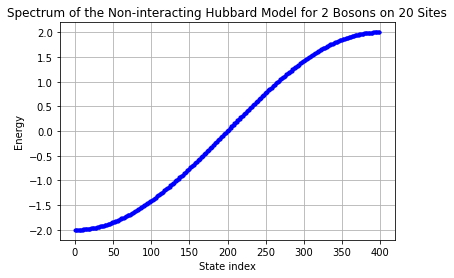

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Define parameters
L = 20   # Number of lattice sites
N = 2   # Number of bosonic particles
t = 1.0  # Hopping parameter

# Construct the Hamiltonian matrix
H = np.zeros((L**N, L**N), dtype=np.complex128)

# Diagonal terms (kinetic energy)
for i in range(L**N):
    H[i, i] = -2 * t * 0

# Off-diagonal terms (hopping)
for i in range(L**N - 1):
    H[i, i+1] = H[i+1, i] = -t

# Periodic boundary conditions
H[0, -1] = H[-1, 0] = -t

# Diagonalize the Hamiltonian
energies, states = eigh(H)

# Plot the spectrum
plt.plot(np.arange(len(energies)), energies, 'b.')
plt.xlabel('State index')
plt.ylabel('Energy')
plt.title('Spectrum of the Non-interacting Hubbard Model for {} Bosons on {} Sites'.format(N, L))
plt.grid(True)
plt.show()

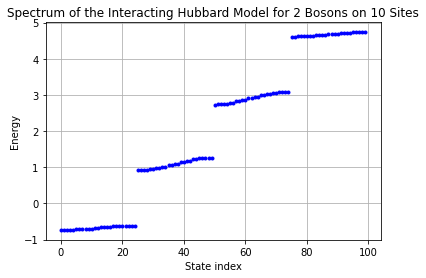

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Define parameters
L = 10   # Number of lattice sites
N = 2   # Number of bosonic particles
t = 1.0  # Hopping parameter
U = 2.0  # On-site interaction energy

# Construct the Hamiltonian matrix
H = np.zeros((L**N, L**N), dtype=np.complex128)

# Diagonal terms (kinetic energy)
for i in range(L**N):
    H[i, i] = -2 * t * 0

# Off-diagonal terms (hopping)
for i in range(L**N - 1):
    H[i, i+1] = H[i+1, i] = -t

# Periodic boundary conditions
H[0, -1] = H[-1, 0] = -t

# Interaction term
for i in range(L**N):
    H[i, i] += U * np.sum(np.array([((i >> j) & 1) for j in range(N)]))

# Diagonalize the Hamiltonian
energies, states = eigh(H)

# Plot the spectrum
plt.plot(np.arange(len(energies)), energies, 'b.')
plt.xlabel('State index')
plt.ylabel('Energy')
plt.title('Spectrum of the Interacting Hubbard Model for {} Bosons on {} Sites'.format(N, L))
plt.grid(True)
plt.show()

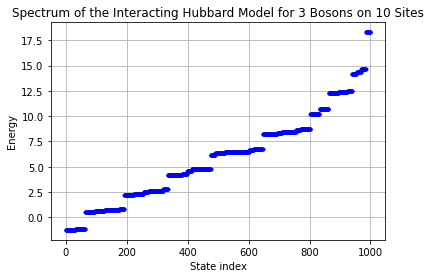

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Define parameters
L = 10   # Number of lattice sites
N = 3    # Number of bosonic particles
t = 1.0  # Hopping parameter
U = 2.0  # On-site interaction energy

# Construct the Hamiltonian matrix
H = np.zeros((L**N, L**N), dtype=np.complex128)

# Diagonal terms (kinetic energy)
for i in range(L**N):
    H[i, i] = -2 * t * 0

# Off-diagonal terms (hopping)
for i in range(L**N - 1):
    H[i, i+1] = H[i+1, i] = -t

# Periodic boundary conditions
H[0, -1] = H[-1, 0] = -t

# Interaction term
for i in range(L**N):
    # Count the number of bosons on each site
    n_on_site = np.array([((i >> (2 * j)) & 3) for j in range(N)])  # 3 is 11 in binary representing 3 bosons
    H[i, i] += U * np.sum(n_on_site * (n_on_site - 1) / 2)  # Account for the interaction energy

# Diagonalize the Hamiltonian
energies, states = eigh(H)

# Plot the spectrum
plt.plot(np.arange(len(energies)), energies, 'b.')
plt.xlabel('State index')
plt.ylabel('Energy')
plt.title('Spectrum of the Interacting Hubbard Model for {} Bosons on {} Sites'.format(N, L))
plt.grid(True)
plt.show()


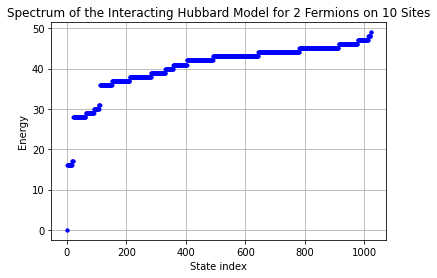

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Define parameters
L = 10   # Number of lattice sites
N = 2    # Number of fermionic particles
t = 1.0  # Hopping parameter
U = 2.0  # On-site interaction energy

# Construct the Hamiltonian matrix
H = np.zeros((2**L, 2**L), dtype=np.complex128)

# Diagonal terms (kinetic energy)
for i in range(2**L):
    for j in range(L - 1):  # Account for 2 fermions
        if (i >> j) & 1 != (i >> (j + 1)) & 1:  # Check if neighboring sites have different occupation
            H[i, i] -= t

# Periodic boundary conditions
for i in range(L - 1):  # Account for 2 fermions
    if (i >> (L - 1)) & 1 != (i >> 0) & 1:  # Check boundary sites
        H[2**i, 2**(L-1)] -= t

# Interaction term
for i in range(2**L):
    n_up = bin(i).count('1')  # Count the number of up spins
    n_down = L - bin(i).count('1')  # Count the number of down spins
    H[i, i] += U * n_up * n_down  # Modify interaction term for two fermions

# Diagonalize the Hamiltonian
energies, states = eigh(H)

# Plot the spectrum
plt.plot(np.arange(len(energies)), energies, 'b.')
plt.xlabel('State index')
plt.ylabel('Energy')
plt.title('Spectrum of the Interacting Hubbard Model for {} Fermions on {} Sites'.format(N, L))
plt.grid(True)
plt.show()


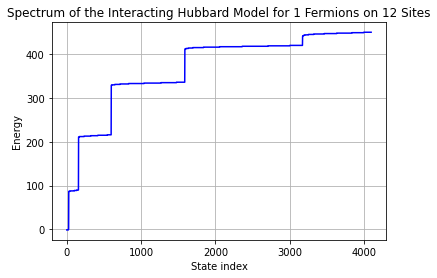

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Define parameters
L = 12   # Number of lattice sites
N = 1    # Number of fermionic particles
t = 1.0  # Hopping parameter
U = 2.0  # On-site interaction energy

# Construct the Hamiltonian matrix
H = np.zeros((2**L, 2**L), dtype=np.complex128)

# Diagonal terms (kinetic energy)
for i in range(2**L):
    for j in range(L - 2):  # Account for 3 fermions
        if (i >> j) & 1 != (i >> (j + 1)) & 1 != (i >> (j + 2)) & 1:  # Check if neighboring sites have different occupation
            H[i, i] -= t

# Periodic boundary conditions
for i in range(L - 2):  # Account for 3 fermions
    if (i >> (L - 2)) & 1 != (i >> (L - 1)) & 1 != (i >> 0) & 1:  # Check boundary sites
        H[2**i, 2**(L-2)] -= t

# Interaction term
for i in range(2**L):
    n_up = bin(i).count('1')  # Count the number of up spins
    n_down = L - bin(i).count('1')  # Count the number of down spins
    H[i, i] += U * n_up * (n_up - 1) * n_down * (n_down - 1) / 4  # Modify interaction term for three fermions

# Diagonalize the Hamiltonian
energies, states = eigh(H)

# Plot the spectrum
plt.plot(np.arange(len(energies)), energies, 'b-')
plt.xlabel('State index')
plt.ylabel('Energy')
plt.title('Spectrum of the Interacting Hubbard Model for {} Fermions on {} Sites'.format(N, L))
plt.grid(True)
plt.show()


In [ ]:
def Ham():
    Hm = np.zeros([L,L],dtype=complex)

    for n in range(L-1):
        Hm[n,n+1]=-1
        Hm[n+1,n]=-1

    Hm[0,-1]+=-1
    Hm[-1,0]+=-1
    return Hm

Hm = Ham()
EE, UU = eigh(Hm)
plt.plot(EE)

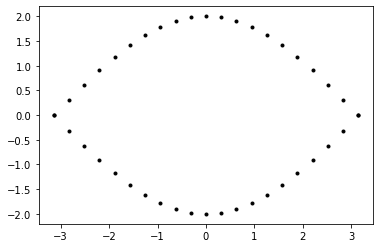

In [16]:
N = 2
xperiod = 2

def Ham(k, xperiod):
    
    Hm = np.zeros([xperiod, xperiod],dtype=complex)
    
    for n in range(xperiod-1):
        Hm[n,n+1] = -1
        Hm[n+1,n] = -1

    Hm[0,-1] += -1*np.exp(-1j * k * xperiod)
    Hm[-1,0] += -1*np.exp(-1j * k * xperiod)
    
    return Hm

kmin = -np.pi / xperiod
kmax = -kmin

Nkx = 2*L + 1
kkx = np.linspace(kmin, kmax, Nkx)
EE = []

for kx in kkx:
    Hm = Ham(kx, xperiod)
    EE, UU = eigh(Hm)
    plt.plot([kx*xperiod]*len(EE), EE, 'k.')

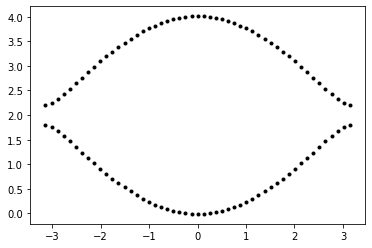

In [54]:
xperiod=2
V0=0.2

def Ham(k,V0,xperiod):
    Hm = np.zeros([xperiod, xperiod], dtype=complex)

    for n in range(xperiod-1):
        Hm[n,n+1]=-1
        Hm[n+1,n]=-1

    for n in range(xperiod//2):
        Hm[n,n] = 2 - V0
        Hm[n+xperiod//2, n+xperiod//2] = 2 + V0

    Hm[0,-1] += -np.exp(-1j*k*xperiod)
    Hm[-1,0] += -np.exp(+1j*k*xperiod)
    return Hm

kmin = -np.pi/(xperiod)
kmax = -kmin

Nkx = 51
kkx = np.linspace(kmin,kmax,Nkx)
EE = []

for kx in kkx:
    Hm = Ham(kx,V0,xperiod)
    EE, UU = eigh(Hm)
    plt.plot([kx*xperiod]*len(EE), EE, 'k.')


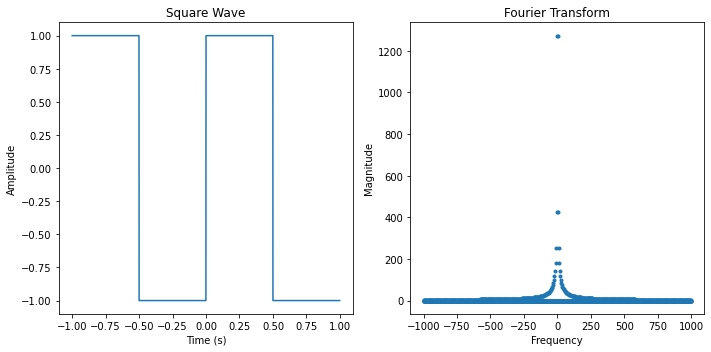

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters
frequency = 1.0  # Frequency of the square wave (in Hz)
sampling_rate = 2000  # Sampling rate (in Hz)
duration = 1.0  # Duration of the signal (in seconds)

# Time array
t = np.linspace(-duration, duration, int(sampling_rate * duration), endpoint=False)

# Generate the square wave
square_wave = signal.square(2 * np.pi * frequency * t)

# Frequency array
freq = np.fft.fftfreq(len(t), 1 / sampling_rate)

# Compute the Fourier transform
fourier_transform = np.fft.fft(square_wave)


# Plot the original array
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(t, square_wave)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Square Wave')

# Plot the Fourier transform
plt.subplot(1, 2, 2)
plt.plot(freq, np.abs(fourier_transform), '.', label='Fourier transform')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Fourier Transform')
plt.tight_layout()
plt.show()